# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [4]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [5]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('../data/raw/car_evaluation.csv')

In [6]:
df_car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Análisis exploratorio de datos

In [7]:
#Visualizacion del dataframe


In [8]:
#Analizamos el shape del objeto
df_car.shape

(1727, 7)

In [9]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [10]:
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
#Vericamos la transformacion


In [12]:
#Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [13]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
#Verificamos valores missings
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [15]:
#Separamos en X e y
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [16]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)


In [17]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [18]:
y_train.shape, y_test.shape

((1208,), (519,))

In [19]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head(10)

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low
887,med,vhigh,2,more,big,low
1000,med,high,3,2,small,high
327,vhigh,low,2,2,med,med
802,high,low,3,more,small,high
832,high,low,4,more,med,high


In [20]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [21]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
#Verificamos la transformacion
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


In [23]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3


In [24]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42)


In [25]:
#Entrenamiento
tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

## Evaluación de modelo de clasificación con árbol de decisión

In [27]:
#Calculo de metricas 
#El accuracy_score nos permite calcular la exactitud de las predicciones
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

#Un valor de accuracy cercano a 1 nos indica que el modelo es bueno
print(f'El accuracy en train es: {train_accuracy_tree:.2f}')
print(f'El accuracy en test es: {test_accuracy_tree:.2f}')

El accuracy en train es: 0.77
El accuracy en test es: 0.80


/tmp/ipykernel_13432/3048384893.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth=2)


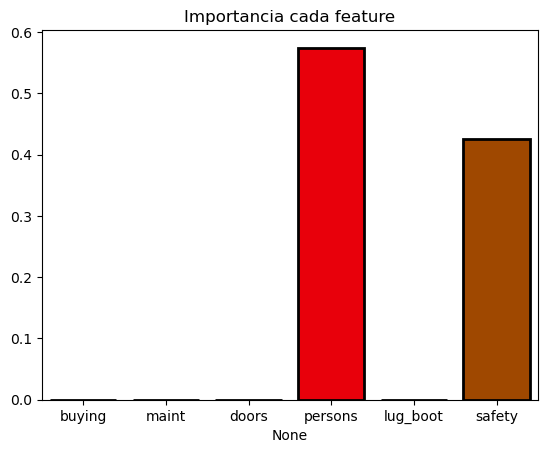

In [28]:
#Verificamos el feature importances
#El feature importance nos permite conocer la importancia de cada variable en el modelo
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth=2)
plt.title('Importancia cada feature')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [29]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
model_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
#Entrenamiento
model_rf.fit(X_train,y_train)


,n_estimators,10
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)


## Evaluación de modelo de clasificación con random forest

In [31]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Accuracy en Train: {accuracy_train_rf:.2f}')

#Calculo el accuracy en Test
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Accuracy en Test: {accuracy_test_rf:.2f}')


#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

Accuracy en Train: 0.70
Accuracy en Test: 0.70


In [32]:
# Visualizacion de las feature importantes
features_scores = pd.Series(model_rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores


persons     0.451759
safety      0.395298
buying      0.077548
doors       0.043243
lug_boot    0.022396
maint       0.009755
dtype: float64

/tmp/ipykernel_13432/4141737490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_scores, y=features_scores.index, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth=2)


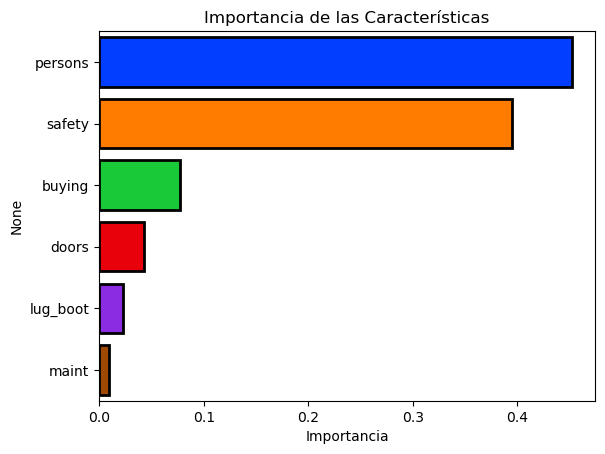

In [33]:
#Grafico de barras
import seaborn as sns
sns.barplot(x=features_scores, y=features_scores.index, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth=2)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')   
plt.show()

In [34]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
print(cm)

plt.show()

[[  0   0 118   0]
 [  0   0  17   0]
 [  0   0 361   0]
 [  0   0  23   0]]


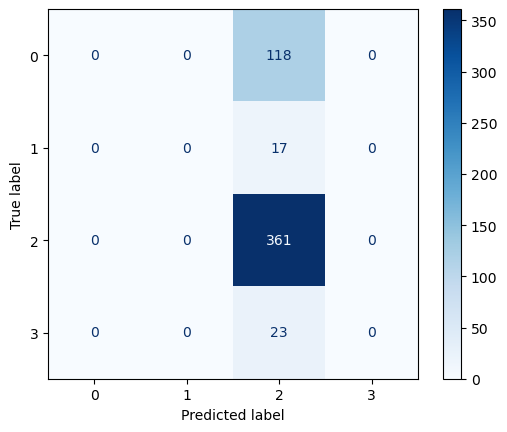

In [35]:
#Generamos la matris de confusion con visualizacion
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [37]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       118
        good       0.00      0.00      0.00        17
       unacc       0.70      1.00      0.82       361
       vgood       0.00      0.00      0.00        23

    accuracy                           0.70       519
   macro avg       0.17      0.25      0.21       519
weighted avg       0.48      0.70      0.57       519



/home/ccortes/anaconda3/envs/ScikitLearnDecTree/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ccortes/anaconda3/envs/ScikitLearnDecTree/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ccortes/anaconda3/envs/ScikitLearnDecTree/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _